 Importing library dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objs as go
from plotly.subplots import make_subplots


import numpy as np

Select a file path and define the csv file to load in dataset

In [2]:
IMDB_data = 'Downloads/IMDB Top 250 Movies.csv'

movies_data = pd.read_csv(IMDB_data )

Display data outputs as well as the description of the dataset for visulation setup and use

In [3]:
movies_data.columns #Displays the names of the columsn which is what we will use later for our data visualization

Index(['rank', 'name', 'year', 'rating', 'genre', 'certificate', 'run_time',
       'tagline', 'budget', 'box_office', 'casts', 'directors', 'writers'],
      dtype='object')

In [39]:
movies_data.head() #Displays the info of the top 5 movies as well as highest and lowest rated movies according to IMDB

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2h 55m,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2h 32m,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3h 22m,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1h 36m,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [5]:
genre_counts = movies_data['genre'].value_counts()       #Display the different types of movie genres along with the frequqnecy in the data set
 
display(genre_counts.head(10))

Drama                         19
Crime,Drama                   14
Animation,Adventure,Comedy    10
Biography,Drama,History        9
Crime,Drama,Mystery            9
Drama,War                      8
Drama,Romance                  6
Crime,Drama,Thriller           5
Action,Crime,Drama             5
Action,Adventure,Drama         5
Name: genre, dtype: int64

In [ ]:
We can now visualize our data

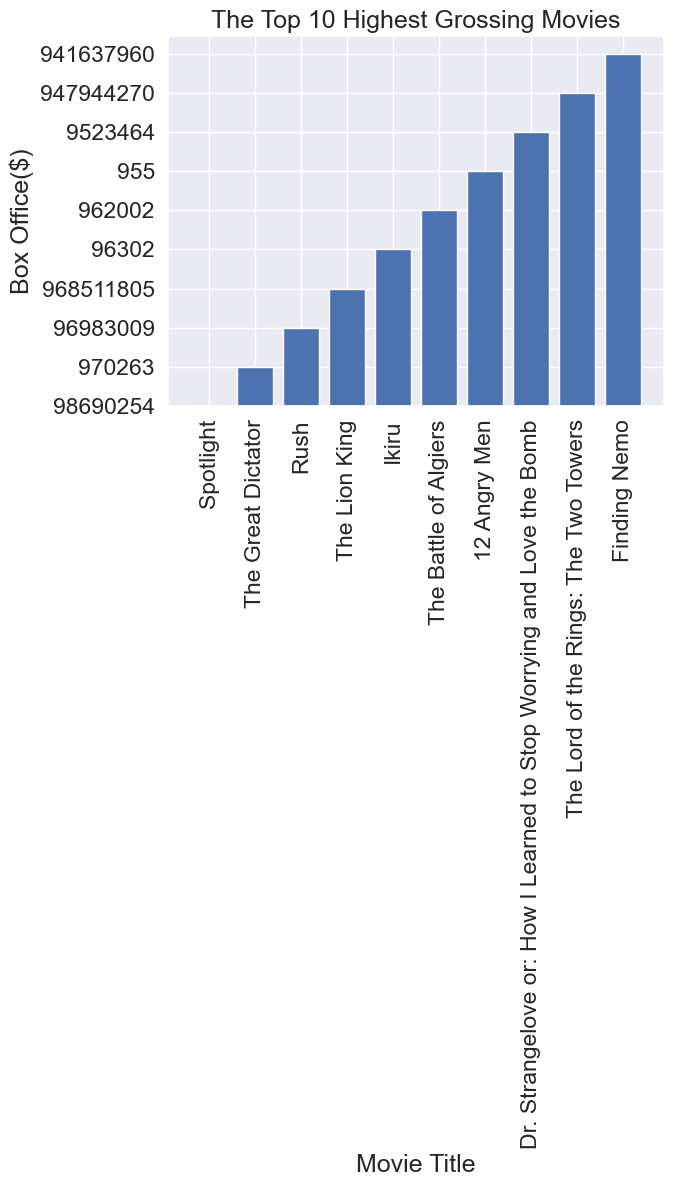

In [65]:
top_grossing_films = movies_data[movies_data['box_office'] != 'Not Available'].sort_values(by='box_office', ascending=False).head(10)



plt.bar(x=top_grossing_films['name'], height=top_grossing_films['box_office'])  #Plot our bar chart which depicts the movie title and box office numbers
plt.xticks(rotation=90)
plt.xlabel('Movie Title')
plt.ylabel('Box Office($)')
plt.title('The Top 10 Highest Grossing Movies')
plt.show()

In [66]:
top_movies_films = movies_data.nlargest(10, 'rating')

fig = go.Figure(data=[go.Bar(x=top_movies['genre'], y=top_movies_films['rating'])])

fig.update_layout(title='Top 10 Movies by Rating')

fig.show()

As you can see from above, there are some correlations between Top 10 most rated and Top 10 highest grossing

In [47]:
fig = px.box(movies_data, x='genre', y='box_office', color='genre', title='The Box Office Amount by Genre')
fig.show()

Data above displays the the box office amount in relation to the genre

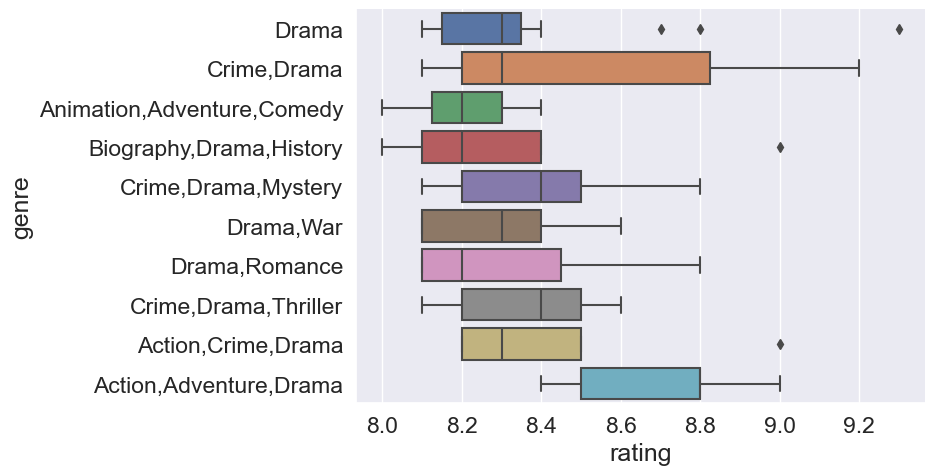

In [67]:

top_genres_films = movies_data['genre'].str.split('|', expand=True).stack().value_counts().head(10).index # Get the top 10 genres by movie count


df_top_genres_films = movies_data[movies_data['genre'].str.contains('|'.join(top_genres_films))]  # Filter the dataset to only include movies in the top 10 genres within the dataset
genre_median_ratings = df_top_genres_films.groupby('genre')['rating'].median().sort_values(ascending=False)



sns.set(style='darkgrid', font_scale=1.5)  # Creating a box plot for each Genre
sns.catplot(x='rating', y='genre', data=df_top_genres_films, kind='box', height=5.1, aspect=1.9, order=top_genres_films)

This box and whiskers plot shows the correlation between the genre and the ratings. Based on the graph we can see that the genre of "Crime,Drama" contains the highest ratings among the rest  

In [ ]:
#Here are two groupby figures from the dataset

In [30]:
grouped_df = movies_data.groupby('genre')['rating'].mean().reset_index()
fig = px.bar(grouped_df, x='genre', y='rating', title='Average Rating by Genre')
fig.update_layout(xaxis_title='Genre', yaxis_title='Average Rating')
fig.show()

This figure groups the genres from the dataset to the average rating

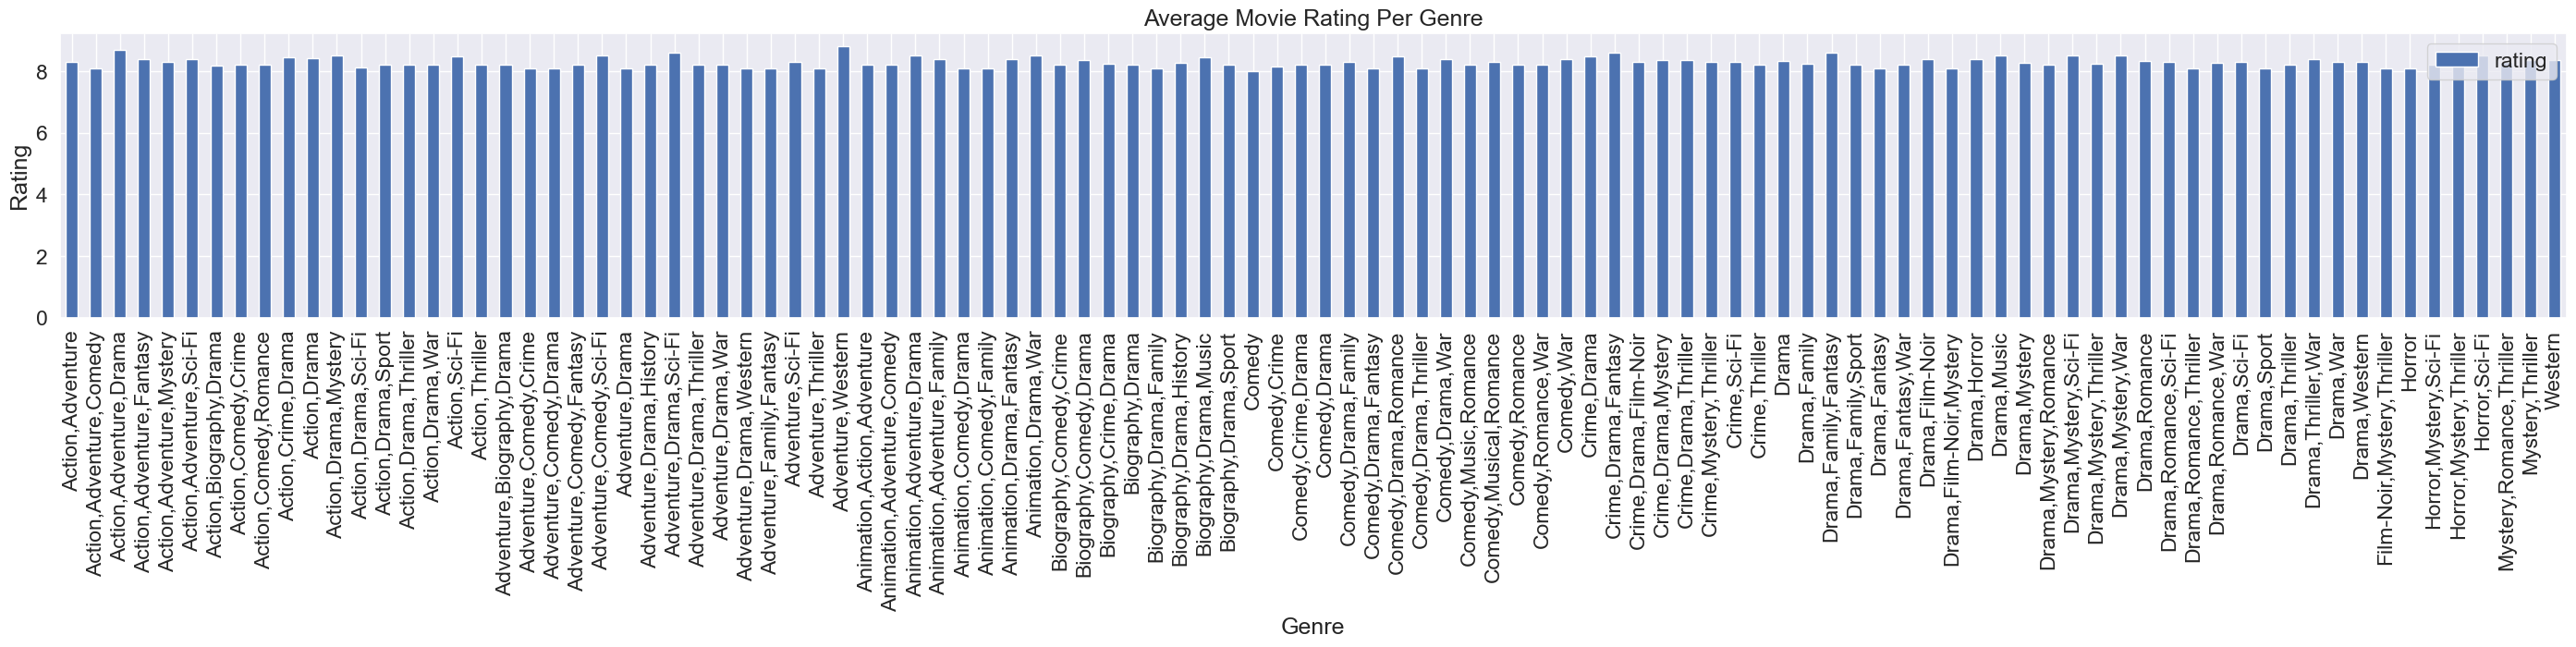

In [68]:
df_genre_agg_group = movies_data[['genre','rating']].groupby(['genre']).mean().reset_index()

ax = df_genre_agg_group.plot.bar(x='genre', y='rating')
ax.figure.set_size_inches(35,4)
ax.set_title("Average Movie Rating Per Genre")

plt.ylabel('Rating')
plt.xlabel('Genre')
plt.show()

The graph above takes all of the genres in the dataset and groups them by rating